In [13]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import os
import csv

import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import normalize

In [2]:
data_path = './ML-for-Astro-data/'

data   = np.load(data_path + "data.npy")
labels = np.load(data_path + 'labels.npy')
wavelengths = np.load(data_path + 'wavelengths.npy')

In [3]:
data.shape

(10000, 3522)

In [4]:
labels.shape

(10000,)

In [5]:
wavelengths.shape

(3522,)

In [6]:
numbers = range(np.shape(data)[0])
wave_shape = np.shape(data)[1]

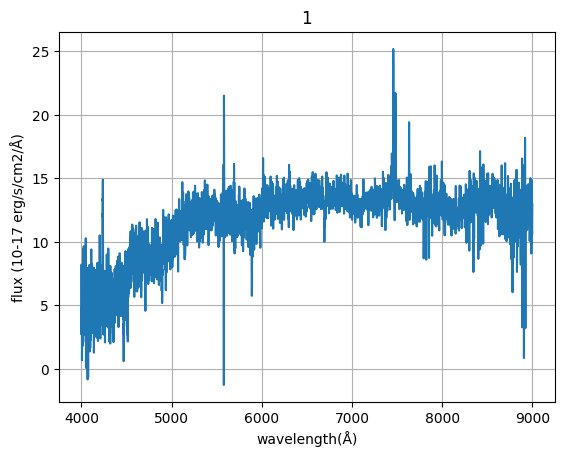

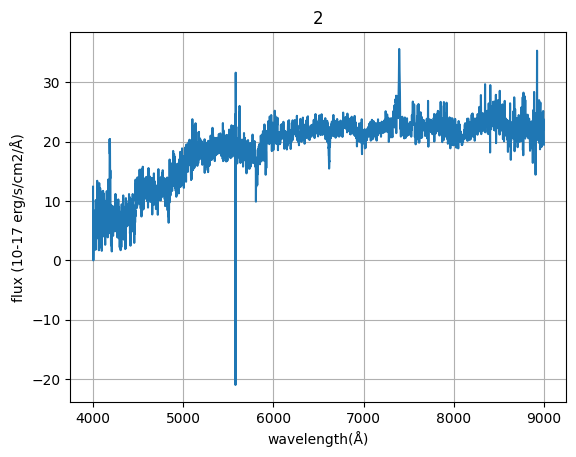

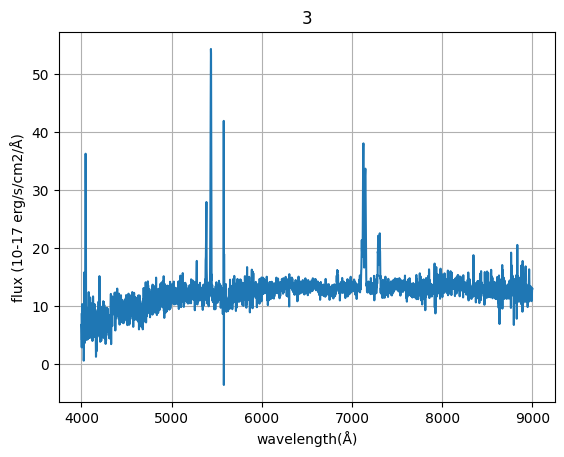

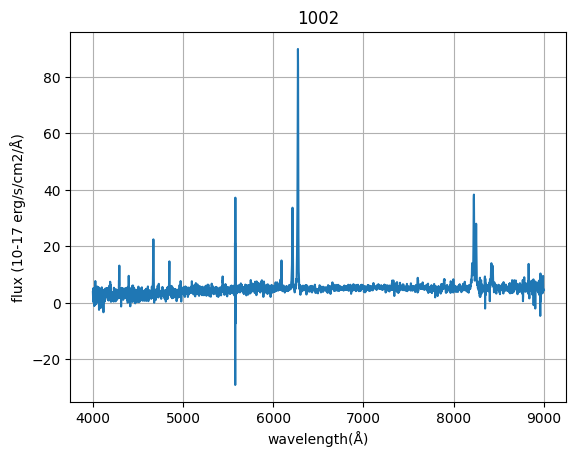

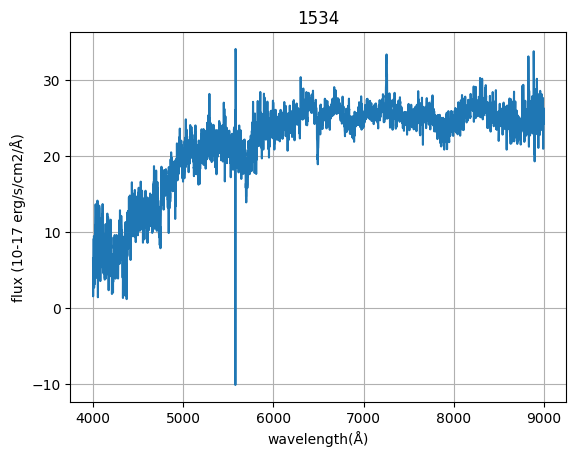

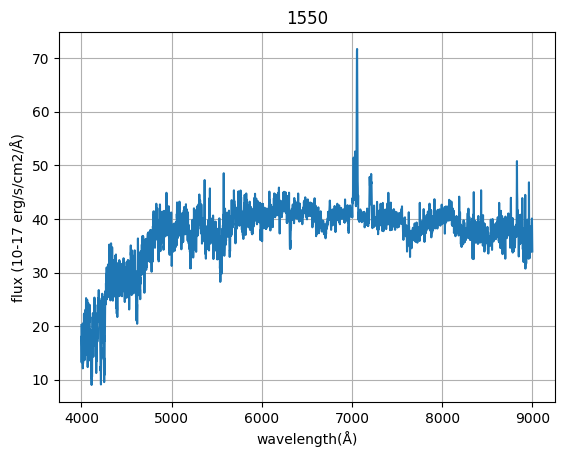

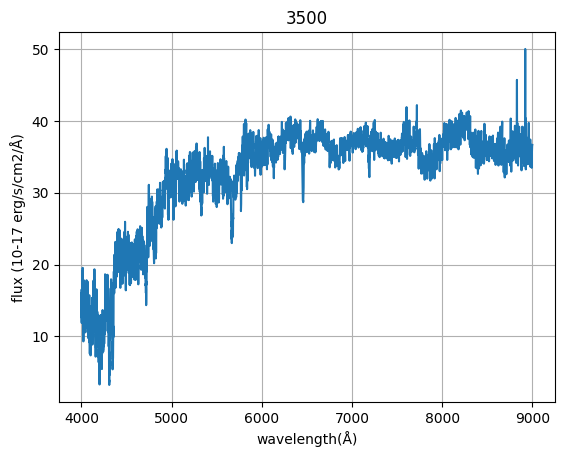

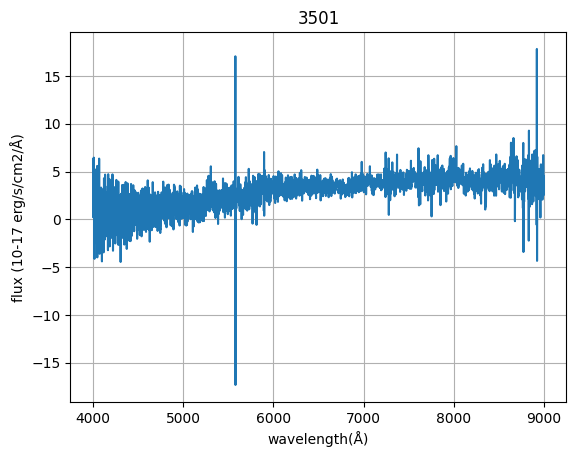

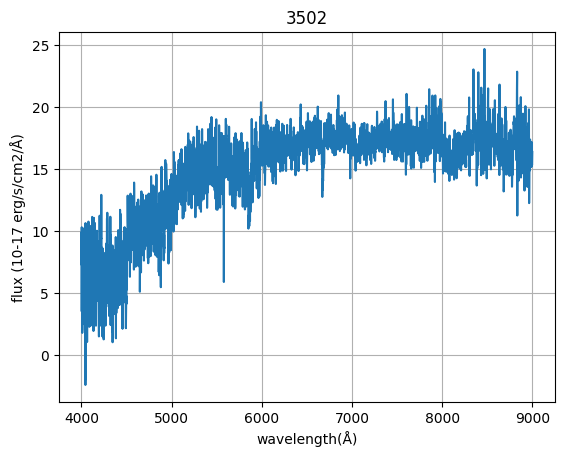

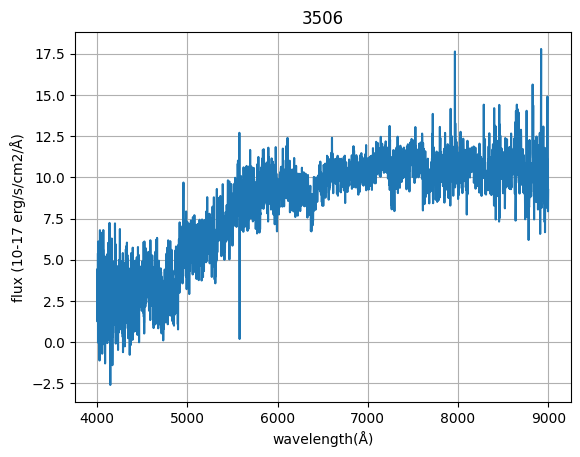

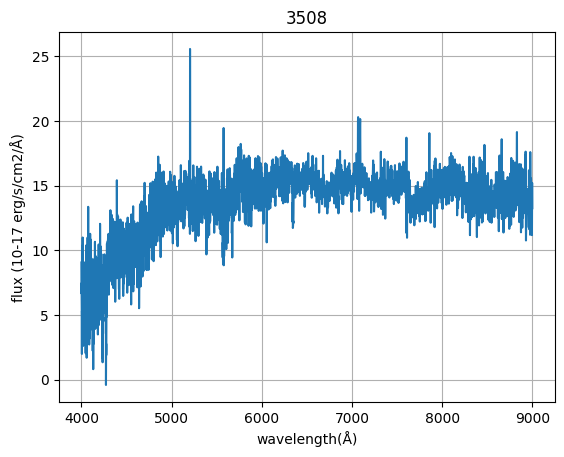

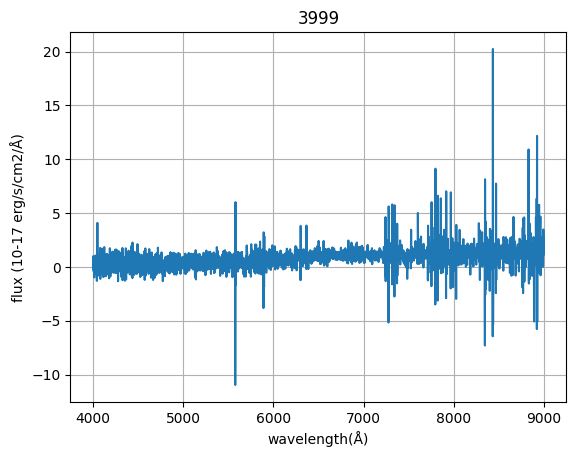

In [7]:
for i in [1, 2, 3, 1002, 1534, 1550, 3500,3501,3502,3506,3508,3999]: # some example spectra
    plt.plot(wavelengths, data[i]) 
    plt.xlabel('wavelength(Å)') 
    plt.ylabel('flux (10-17 erg/s/cm2/Å)') 
    # 10^7 erg = 1 Joule (energy)
    plt.grid(True)
    plt.title(str(i))
    plt.show()

In [8]:
import random

In [9]:
z = list(zip(data, labels, numbers))
random.shuffle(z)
data_shuffled, labels_shuffled, numbers_shuffled = zip(*z)

print(np.array(data_shuffled).shape)
print(np.array(labels_shuffled).shape)

(10000, 3522)
(10000,)


In [10]:
# test and training split
percent_split = 0.9
split_index = int(len(data_shuffled)*percent_split)

# Flux
data_training = np.asarray(data_shuffled[:split_index])
data_test = np.asarray(data_shuffled[split_index:])

# Labels
labels_training = np.asarray(labels_shuffled[:split_index])
labels_test = np.asarray(labels_shuffled[split_index:])

# Number
numbers_training = numbers_shuffled[:split_index]
numbers_test = numbers_shuffled[split_index:]

In [15]:
data_training.shape

(9000, 3522)

In [17]:
# further set-up of training and test data, optional normalization
do_normalize = True

if do_normalize:
    # L2-normalization (i.e. the sum of squared of elements is set equal to one)
    x_train = normalize(data_training, axis=1)
    x_test = normalize(data_test, axis=1)
else:
    x_train = data_training
    x_test = data_test

y_train = labels_training
y_test = labels_test

In [18]:
x_train.shape

(9000, 3522)

In [19]:
y_train.shape

(9000,)

In [20]:
x_test.shape

(1000, 3522)

In [21]:
y_test.shape

(1000,)

In [ ]:
# create network model
# example - try out what happens if you alter different hyperparameters

no_filter = 32
kernel_size = 20
strides = 10
dropout = 0.35
pooling = 3

